## Implementing Custom Loss Function - Huber Loss

In statistics, the Huber loss is a loss function used in robust regression, that is less sensitive to outliers in data than the squared error loss. A variant for classification is also sometimes used.


$$
L_\delta(y, \hat{y}) =
\begin{cases} 
\frac{1}{2}(y - \hat{y})^2 & \text{si } |y - \hat{y}| \leq \delta, \\
\delta \cdot (|y - \hat{y}| - \frac{1}{2}\delta) & \text{si } |y - \hat{y}| > \delta
\end{cases}
$$

where :
- $y$ - the target,
- $\hat{y}$ - the prediction,
- $\delta$ - hyperparameter that control function sensibility.


In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Dense , Input
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt 
print("Version of tensorflow is : ",tf.__version__)

# Create fictive data
xs = np.arange(-5, 5, 1).astype('float32')
ys = xs * 2 - 1

Version of tensorflow is :  2.16.2


In [4]:
# Building our custom loss
def huber_loss(threshold):
    
    def huber_loss_sec(y_true, y_pred):
        
        error = y_true - y_pred
        return_bool = tf.abs(error) <= threshold
        r1 = 0.5 * tf.square(error)
        r2 = threshold * (tf.abs(error) - (0.5 * threshold))
        
        return tf.where(return_bool, r1, r2) # (bool, if_true, if_false)

    return huber_loss_sec

In [16]:
# Building very simple Fonctionnal API model
input = Input(shape = (1,), name = 'input_layer')
output_layer = Dense(units = 1, name = 'output_layer')(input)

model = Model(inputs = input, outputs = output_layer)

# Introduct our customize loss function
model.compile(optimizer = 'sgd', loss = huber_loss(threshold = 1))

history = model.fit(xs, ys, epochs = 150, verbose = 0)

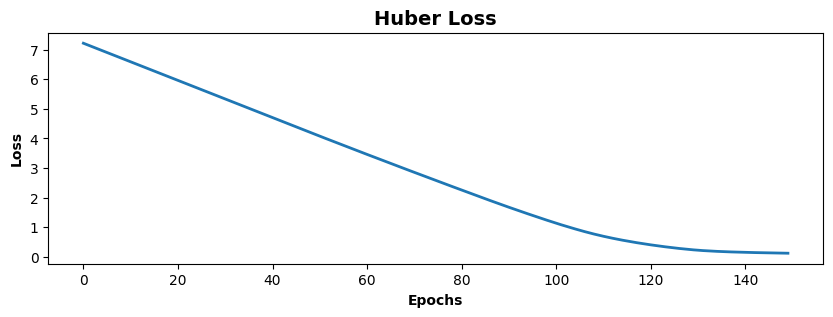

In [30]:
plt.figure(figsize = (10, 3))
plt.plot(history.epoch, history.history['loss'], lw = 2)
plt.xlabel('Epochs', fontsize = 10, fontweight = 'bold')
plt.ylabel('Loss', fontsize = 10, fontweight = 'bold')
plt.title('Huber Loss', fontsize = 14, fontweight = 'bold')
plt.show()

In [31]:
# Our own loss class Object
from tensorflow.keras.losses import Loss

class Huber(Loss):    
    def __init__(self, threshold):
        super().__init__()
        self.threshold = threshold
        
    def call(self, y_true, y_pred):

        error = y_true - y_pred
        return_bool = tf.abs(error) <= self.threshold
        r1 = 0.5 * tf.square(error)
        r2 = self.threshold * (tf.abs(error) - (0.5 * self.threshold))
        
        return tf.where(return_bool, r1, r2) # (bool, if_true, if_false)

In [33]:
# Building very simple Fonctionnal API model
input = Input(shape = (1,), name = 'input_layer')
output_layer = Dense(units = 1, name = 'output_layer')(input)

model = Model(inputs = input, outputs = output_layer)

# Introduct our customize loss function
model.compile(optimizer = 'sgd', loss = Huber(threshold = 0.8))

history2 = model.fit(xs, ys, epochs = 150, verbose = 0)

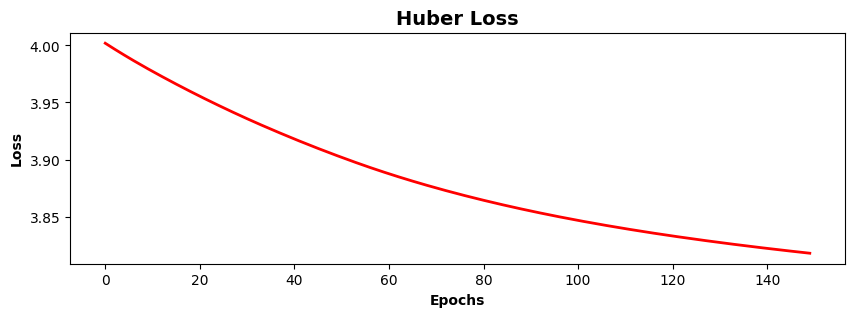

In [34]:
plt.figure(figsize = (10, 3))
plt.plot(history2.epoch, history2.history['loss'], lw = 2, color = 'red')
plt.xlabel('Epochs', fontsize = 10, fontweight = 'bold')
plt.ylabel('Loss', fontsize = 10, fontweight = 'bold')
plt.title('Huber Loss', fontsize = 14, fontweight = 'bold')
plt.show()